# Generalized Linear Models

Using **h2o**

Models being applied:

- GLM Binomial
- GLM Multi-nomial
- GLM Poisson aka count 
- GLM Gamma
- GLM Tweedie


# 1)- Importing key libraries 

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import h2o
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys,h2o

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
seaborn 0.9.0
matplotlib 3.0.2
sys The 'sys' distribution was not found and is required by the application
h2o 3.26.0.3
Sun Aug 25 16:40:29 2019 W. Europe Daylight Time

# 2)- Initiate h2o

In [7]:
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\Hassan\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Hassan\AppData\Local\Temp\tmpjhpem3l0
  JVM stdout: C:\Users\Hassan\AppData\Local\Temp\tmpjhpem3l0\h2o_Hassan_started_from_python.out
  JVM stderr: C:\Users\Hassan\AppData\Local\Temp\tmpjhpem3l0\h2o_Hassan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_7qq43r
H2O cluster total nodes:,1
H2O cluster free memory:,3.542 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


# 3)- Loading data

In [8]:
prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
prostate.head()

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [10]:
prostate.shape

(380, 9)

In [11]:
type(prostate)

h2o.frame.H2OFrame

In [ ]:
prostate.summary()

# 4)- Model building

- **binomial**

### 4.1)- Selecting key features

In [12]:
# converting normal dataframe to H2OFrame..........ONLY FOR NUMERICAL FEATURES
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

In [13]:
prostate.summary()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,enum,int,int,int,int,real,real,int
mins,1.0,,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,,66.03947368421049,1.0868421052631572,2.2710526315789488,1.1078947368421048,15.408631578947375,15.812921052631573,6.3842105263157904
maxs,380.0,,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.84079387914127,,6.527071269173311,0.3087732580252793,1.0001076181502861,0.3106564493514939,19.99757266856046,18.347619967271175,1.0919533744261092
zeros,0,,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [14]:
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()
prostate['RACE'] = prostate['RACE'].asfactor()
prostate['DCAPS'] = prostate['DCAPS'].asfactor()
prostate['DPROS'] = prostate['DPROS'].asfactor()
#prostate['VOL'] = prostate['VOL'].asfactor()# Only 'int' or 'string' are allowed for asfactor()

In [15]:
prostate.summary()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,enum,int,enum,enum,enum,real,real,int
mins,1.0,,43.0,,,,0.3,0.0,0.0
mean,190.5,,66.03947368421049,,,,15.408631578947375,15.812921052631573,6.3842105263157904
maxs,380.0,,79.0,,,,139.7,97.6,9.0
sigma,109.84079387914127,,6.527071269173311,,,,19.99757266856046,18.347619967271175,1.0919533744261092
zeros,0,,0,,,,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0,65.0,1,2,1,1.4,0.0,6.0
1,2.0,0,72.0,1,3,2,6.7,0.0,7.0
2,3.0,0,70.0,1,1,2,4.9,0.0,6.0


In [16]:
type(prostate)

h2o.frame.H2OFrame

### 4.2)- Splitting into predictor and response features

In [17]:
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

### 4.3)- Training model

We will take care of multi-colinearity at an initial stage

In [18]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",lambda_ = 0, remove_collinear_columns= True,compute_p_values=True)
glm_model.train(predictors, response_col, training_frame= prostate)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
print(glm_model)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,5,5,4,py_6_sid_9a7e




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18215831942350072
RMSE: 0.4268000930453281
LogLoss: 0.5406879877388552
Null degrees of freedom: 379
Residual degrees of freedom: 374
Null deviance: 512.2888401848891
Residual deviance: 410.9228706815299
AIC: 422.9228706815299
AUC: 0.7857533615502001
pr_auc: 0.7158310818344481
Gini: 0.5715067231004003

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3263180019526919: 

,,0,1,Error,Rate
0,0,148.0,79.0,0.348,(79.0/227.0)
1,1,32.0,121.0,0.2092,(32.0/153.0)
2,Total,180.0,200.0,0.2921,(111.0/380.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326318,0.685552,143.0
1,max f2,0.199660,0.803279,230.0
2,max f0point5,0.546868,0.673813,86.0
3,max accuracy,0.477010,0.736842,120.0
4,max precision,0.964240,1.000000,0.0
5,max recall,0.081948,1.000000,282.0
6,max specificity,0.964240,1.000000,0.0
7,max absolute_mcc,0.477010,0.456656,120.0
8,max min_per_class_accuracy,0.370958,0.713656,134.0
9,max mean_per_class_accuracy,0.477010,0.729665,120.0



Gains/Lift Table: Avg response rate: 40.26 %, avg score: 40.26 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010526,0.945562,2.483660,2.483660,1.000000,0.956018,1.000000,0.956018,0.026144,0.026144,148.366013,148.366013
1,,2,0.021053,0.929459,2.483660,2.483660,1.000000,0.934626,1.000000,0.945322,0.026144,0.052288,148.366013,148.366013
2,,3,0.031579,0.915213,1.862745,2.276688,0.750000,0.922497,0.916667,0.937714,0.019608,0.071895,86.274510,127.668845
3,,4,0.042105,0.849528,2.483660,2.328431,1.000000,0.870899,0.937500,0.921010,0.026144,0.098039,148.366013,132.843137
4,,5,0.050000,0.845594,2.483660,2.352941,1.000000,0.846093,0.947368,0.909181,0.019608,0.117647,148.366013,135.294118
5,,6,0.100000,0.772739,1.960784,2.156863,0.789474,0.824918,0.868421,0.867050,0.098039,0.215686,96.078431,115.686275
6,,7,0.152632,0.632594,1.862745,2.055443,0.750000,0.668554,0.827586,0.798603,0.098039,0.313725,86.274510,105.544287
7,,8,0.205263,0.603038,1.241830,1.846824,0.500000,0.614660,0.743590,0.751438,0.065359,0.379085,24.183007,84.682420
8,,9,0.300000,0.564301,1.586783,1.764706,0.638889,0.583517,0.710526,0.698411,0.150327,0.529412,58.678286,76.470588
9,,10,0.400000,0.490183,1.176471,1.617647,0.473684,0.530552,0.651316,0.656446,0.117647,0.647059,17.647059,61.764706




Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 16:43:17,0.000 sec,0,256.144420,0.674064
1,,2019-08-25 16:43:17,0.016 sec,1,209.722375,0.551901
2,,2019-08-25 16:43:17,0.016 sec,2,205.577602,0.540994
3,,2019-08-25 16:43:17,0.016 sec,3,205.461575,0.540688
4,,2019-08-25 16:43:17,0.016 sec,4,205.461435,0.540688


### 4.4)- Results

In [20]:
# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())

{'Intercept': -6.675155394082711, 'RACE.1': -0.442787516808813, 'RACE.2': -0.5899232636956414, 'AGE': -0.017888697161812357, 'VOL': -0.012783348665664449, 'GLEASON': 1.2503593867263172}


In [21]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(glm_model.coef_norm())

{'Intercept': -0.07610006436753279, 'RACE.1': -0.442787516808813, 'RACE.2': -0.5899232636956414, 'AGE': -0.11676080128780758, 'VOL': -0.2345440232267344, 'GLEASON': 1.3653341515811626}


In [22]:
# Print the Coefficients table
glm_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-6.675155,1.931760,-3.455478,5.493181e-04,-0.076100
1,RACE.1,-0.442788,1.324231,-0.334373,7.380978e-01,-0.442788
2,RACE.2,-0.589923,1.373466,-0.429514,6.675490e-01,-0.589923
3,AGE,-0.017889,0.018702,-0.956516,3.388116e-01,-0.116761
4,VOL,-0.012783,0.007514,-1.701191,8.890718e-02,-0.234544
5,GLEASON,1.250359,0.156156,8.007103,1.221245e-15,1.365334


### 4.5)-Quantities of interest

In [23]:
# Print the Standard error
print(glm_model._model_json['output']['coefficients_table']['std_error'])

[1.9317603626604154, 1.3242308316851048, 1.3734657932878145, 0.01870193337051069, 0.007514353657915353, 0.15615627100849927]


[1.9317603626604352,
 1.3242308316851008,
 1.3734657932878116,
 0.01870193337051072,
 0.007514353657915356,
 0.15615627100850296]

In [24]:
# Print the p values
print(glm_model._model_json['output']['coefficients_table']['p_value'])

[0.0005493180609458248, 0.7380978369202372, 0.6675489550762541, 0.33881164088847104, 0.08890718096586625, 1.2212453270876722e-15]


[0.0005493180609459358,
 0.73809783692024,
 0.6675489550762566,
 0.33881164088847204,
 0.0889071809658667,
 1.2212453270876722e-15]

In [25]:
# Print the z values
print(glm_model._model_json['output']['coefficients_table']['z_value'])

[-3.4554779791059094, -0.3343733631736688, -0.4295143472655973, -0.9565159284557903, -1.701190714147307, 8.007103260414452]


[-3.4554779791058787,
 -0.3343733631736653,
 -0.42951434726559384,
 -0.9565159284557886,
 -1.7011907141473064,
 8.007103260414265]

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


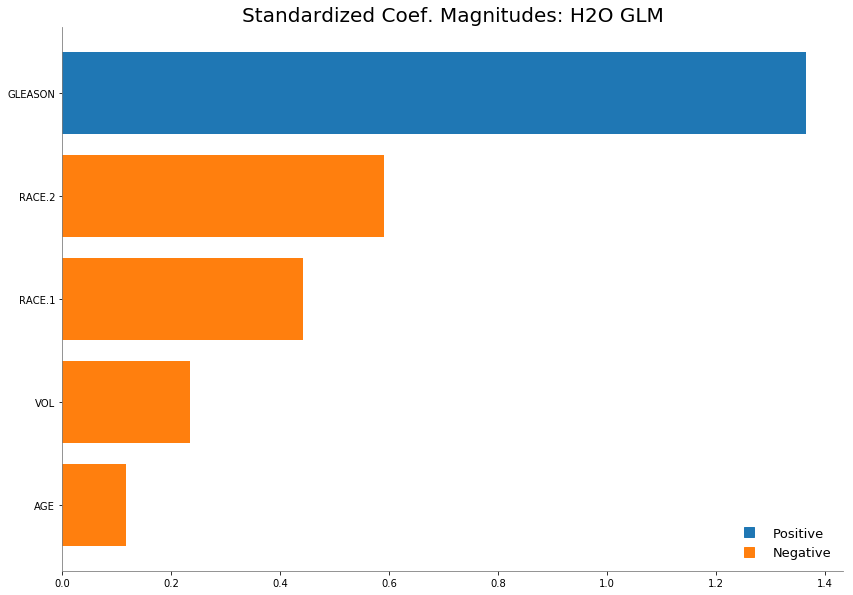

In [29]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
glm_model.std_coef_plot()

# 5)- Grid Search 

- Over Alpha
- Over Lambda


### 5a)- Grid Search over Alpha

In [34]:
from h2o.grid.grid_search import H2OGridSearch
alpha_opts = [0.0, 0.25, 0.5, 1.0]
hyper_parameters = {"alpha":alpha_opts} 
grid = H2OGridSearch(H2OGeneralizedLinearEstimator( family="binomial"), hyper_params = hyper_parameters)
grid.train(y = "CAPSULE", x = ["AGE", "RACE", "PSA", "GLEASON"], training_frame = prostate) 
for m in grid: 
    print ("Model ID: " + m.model_id + " auc: " , m.auc ())
    print (m.summary()) 
    print ("\n\n")

glm Grid Build progress: |████████████████████████████████████████████████| 100%
Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_3_model_1 auc:  0.7930811090956207

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 2.222E-4 ),6,6,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_3_model_4 auc:  0.7931099018168207

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Lasso (lambda = 2.222E-4 ),6,5,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_3_model_3 auc:  0.7932538654228211

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.445E-4 )",6,5,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_3_model_2 auc:  0.7933690363076215

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.25, lambda = 8.89E-4 )",6,5,4,py_6_sid_9a7e


### 5b)- Grid Search over Lambda

In [35]:
lambda_opts = [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0] 
hyper_parameters = {"lambda":lambda_opts} 
grid = H2OGridSearch(H2OGeneralizedLinearEstimator( family="binomial"), hyper_params=hyper_parameters)
grid.train(y = "CAPSULE", x = ["AGE", "RACE", "PSA", "GLEASON"], training_frame = prostate) 
for m in grid: 
    print ("Model ID:", m.model_id, " auc:", m.auc())
    print (m.summary()) 
    print ("\n\n")

glm Grid Build progress: |████████████████████████████████████████████████| 100%
Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_8  auc: 0.7931099018168207

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,5,5,5,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_7  auc: 0.7931099018168207

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.0E-5 )",6,6,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_6  auc: 0.7931099018168207

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.0E-4 )",6,6,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_5  auc: 0.7931674872592209

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.001 )",6,5,4,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_4  auc: 0.7909216550056145

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.01 )",6,5,6,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_3  auc: 0.7904897641876134

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.1 )",6,2,3,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_2  auc: 0.5

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.5 )",6,0,1,py_6_sid_9a7e






Model ID: Grid_GLM_py_6_sid_9a7e_model_python_1566744124179_8_model_1  auc: 0.5

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.0 )",6,0,1,py_6_sid_9a7e


# 6)- Multi-nomial Model

In [36]:
from h2o.estimators.glm  import H2OGeneralizedLinearEstimator 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,21 mins 41 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_7qq43r
H2O cluster total nodes:,1
H2O cluster free memory:,3.221 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [41]:
iris = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris.csv") 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
iris.head()

C1,C2,C3,C4,C5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [43]:
predictors = ["C1", "C2", "C3", "C4"]
response_col = "C5"

**again, get to deal with multi-colinearity**

In [45]:
multinomial_fit = H2OGeneralizedLinearEstimator(family = "multinomial")
multinomial_fit.train(y = 4, x = [0,1,2,3], training_frame = iris)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
print(multinomial_fit)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_19


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,"Elastic Net (alpha = 0.5, lambda = 8.67E-4 )",15,11,23,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.014742589738302845
RMSE: 0.12141906661765624

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:13:03,0.000 sec,0,164.791843,1.098612
1,,2019-08-25 17:13:03,0.020 sec,1,57.509996,0.388249
2,,2019-08-25 17:13:03,0.032 sec,2,28.252851,0.199036
3,,2019-08-25 17:13:03,0.040 sec,3,15.836846,0.123715
4,,2019-08-25 17:13:03,0.044 sec,4,11.018392,0.099190
5,,2019-08-25 17:13:03,0.052 sec,5,9.349863,0.092463
6,,2019-08-25 17:13:03,0.060 sec,6,8.913268,0.091009
7,,2019-08-25 17:13:03,0.064 sec,7,8.729332,0.090719
8,,2019-08-25 17:13:03,0.072 sec,8,8.643123,0.090558
9,,2019-08-25 17:13:03,0.080 sec,9,8.671694,0.090454



See the whole table with table.as_data_frame()



# 7)- Poisson Models

In [47]:
motor = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt", sep = '\t') 


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [48]:
motor.head()

Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
1,1,1,1,455.13,108,392491
1,1,1,2,69.17,19,46221
1,1,1,3,72.88,13,15694
1,1,1,4,1292.39,124,422201
1,1,1,5,191.01,40,119373
1,1,1,6,477.66,57,170913
1,1,1,7,105.58,23,56940
1,1,1,8,32.55,14,77487
1,1,1,9,9998.46,1704,6.80599e+06
1,1,2,1,314.58,45,214011


In [53]:
motor.summary()

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
type,int,int,int,int,real,int,int
mins,1.0,1.0,1.0,1.0,0.01,0.0,0.0
mean,2.9857928505957827,3.9702108157653533,4.01512373968836,4.991750687442713,1092.1952703941352,51.865719523372995,257007.6448212649
maxs,5.0,7.0,7.0,9.0,127687.27,3338.0,18245026.0
sigma,1.4104086085546428,1.988857510408954,2.0005158569701793,2.5869431535278427,5661.156244715404,201.7106935118666,1017282.5856477643
zeros,0,0,0,0,0,385,385
missing,0,0,0,0,0,0,0
0,1.0,1.0,1.0,1.0,455.13,108.0,392491.0
1,1.0,1.0,1.0,2.0,69.17,19.0,46221.0
2,1.0,1.0,1.0,3.0,72.88,13.0,15694.0


In [49]:
poisson_fit = H2OGeneralizedLinearEstimator(family = " poisson",lambda_ = 0, remove_collinear_columns= True,compute_p_values=True)
poisson_fit.train(y= "Claims" , x = ["Payment", "Insured", "Kilometres", "Zone", "Bonus", "Make"], training_frame = motor)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [50]:
print(poisson_fit)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_20


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,poisson,log,None,6,6,6,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 18287.328901692104
RMSE: 135.23065074786894
MAE: 40.41030288136362
RMSLE: 1.7658170521996852
R^2: 0.55033248798047
Mean Residual Deviance: 53.17217585124376
Null degrees of freedom: 2181
Residual degrees of freedom: 2175
Null deviance: 435505.0456453899
Residual deviance: 116021.68770741388
AIC: 123673.42803356209

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:16:56,0.000 sec,0,435505.045645,199.589847
1,,2019-08-25 17:16:56,0.020 sec,1,210276.874695,96.368870
2,,2019-08-25 17:16:56,0.024 sec,2,134559.405037,61.667922
3,,2019-08-25 17:16:56,0.032 sec,3,116149.265044,53.230644
4,,2019-08-25 17:16:56,0.036 sec,4,116021.815340,53.172234
5,,2019-08-25 17:16:56,0.036 sec,5,116021.687708,53.172176
6,,2019-08-25 17:16:56,0.040 sec,6,116021.687707,53.172176


In [51]:
# Coefficients that can be applied to the non-standardized data.
print(poisson_fit.coef())

{'Intercept': 2.5822368526491166, 'Kilometres': -0.24677600908636968, 'Zone': -0.11876052909495259, 'Bonus': 0.13082512307229846, 'Make': 0.23191707139739182, 'Insured': -5.4928746201778095e-05, 'Payment': 5.931233707518411e-07}


In [54]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(poisson_fit.coef_norm())

{'Intercept': 3.1493060536896644, 'Kilometres': -0.34805500760017394, 'Zone': -0.23619777023063776, 'Bonus': 0.2617177331962081, 'Make': 0.5999562800377105, 'Insured': -0.31096021457458406, 'Payment': 0.6033740762065506}


In [55]:
# Print the Coefficients table
poisson_fit._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.582237e+00,1.604723e-02,160.914793,0.0,3.149306
1,Kilometres,-2.467760e-01,2.602166e-03,-94.834829,0.0,-0.348055
2,Zone,-1.187605e-01,1.829220e-03,-64.924142,0.0,-0.236198
3,Bonus,1.308251e-01,1.598831e-03,81.825491,0.0,0.261718
4,Make,2.319171e-01,1.655148e-03,140.118597,0.0,0.599956
5,Insured,-5.492875e-05,3.562449e-07,-154.188166,0.0,-0.310960
6,Payment,5.931234e-07,2.280965e-09,260.031722,0.0,0.603374


C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


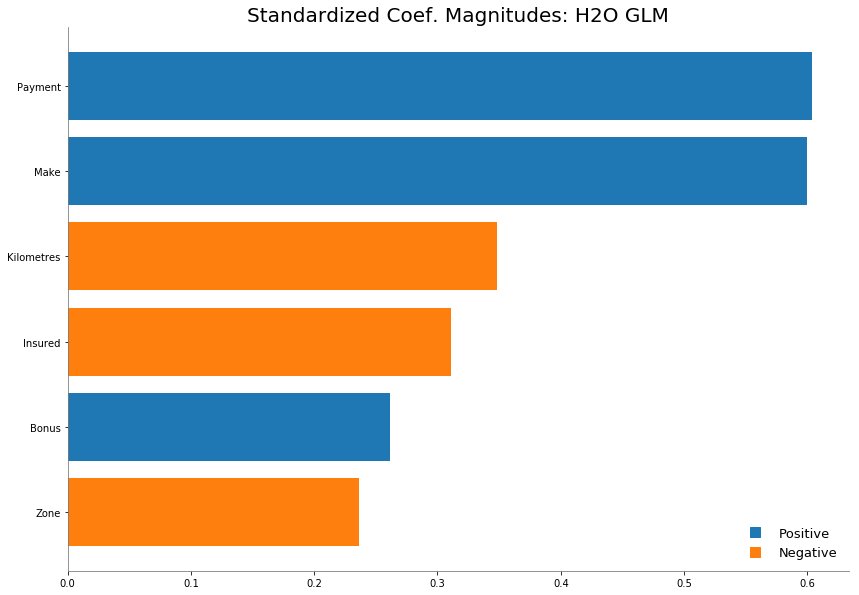

In [59]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
poisson_fit.std_coef_plot()

# 8)- Gamma Models

The gamma distribution is useful for modeling a positive continuous response variable, where the conditional variance of the response grows with its mean but the coeﬃcient of variation of the response σ2(yi)/µi is constant. It is usually used with the log link g(µi) = log(µi), or the inverse link g(µi) = 1 µi which is equivalent to the canonical link

In [60]:
 h2o_df = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv") 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
 h2o_df.head()

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [62]:
gamma_inverse = H2OGeneralizedLinearEstimator(family = "gamma", link = "inverse") 
gamma_inverse.train(y = "DPROS", x = ["AGE","RACE","CAPSULE","DCAPS","PSA","VOL"], training_frame = h2o_df) 

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [63]:
print(gamma_inverse)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_21


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gamma,inverse,"Elastic Net (alpha = 0.5, lambda = 6.487E-4 )",6,6,4,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.8504941247611986
RMSE: 0.9222223835719878
MAE: 0.7474276673746836
RMSLE: 0.2947746367172999
R^2: 0.14744533800170045
Mean Residual Deviance: 0.19097946110478994
Null degrees of freedom: 379
Residual degrees of freedom: 373
Null deviance: 82.5133957850665
Residual deviance: 72.57219521982017
AIC: NaN

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:25:02,0.000 sec,0,82.513396,0.217141
1,,2019-08-25 17:25:02,0.004 sec,1,73.535954,0.193554
2,,2019-08-25 17:25:02,0.004 sec,2,72.594841,0.191073
3,,2019-08-25 17:25:02,0.004 sec,3,72.572201,0.191013
4,,2019-08-25 17:25:02,0.004 sec,4,72.572195,0.191013


In [64]:
gamma_log = H2OGeneralizedLinearEstimator(family = " gamma", link = "log") 
gamma_log.train(y="DPROS", x = ["AGE","RACE","CAPSULE" ,"DCAPS","PSA","VOL"], training_frame = h2o_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [65]:
print(gamma_log)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_22


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gamma,log,"Elastic Net (alpha = 0.5, lambda = 2.857E-4 )",6,6,3,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.850421340023459
RMSE: 0.9221829211297827
MAE: 0.7498332179466439
RMSLE: 0.29472643736366855
R^2: 0.14751829907888558
Mean Residual Deviance: 0.19078203653382134
Null degrees of freedom: 379
Residual degrees of freedom: 373
Null deviance: 82.5133957850665
Residual deviance: 72.49717388285211
AIC: NaN

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:25:35,0.000 sec,0,82.513396,0.217141
1,,2019-08-25 17:25:35,0.000 sec,1,72.664152,0.191261
2,,2019-08-25 17:25:35,0.000 sec,2,72.497246,0.190819
3,,2019-08-25 17:25:35,0.000 sec,3,72.497174,0.190819


# 9)- Tweedie Models
Tweedie distributions are a family of distributions which include gamma, normal, Poisson and their combination. It is especially useful for modeling positive continuous variables with exact zeros. The variance of the Tweedie distribution is proportional to the p-th power of the mean var(yi) = φµp i 

In [66]:
h2o_df = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/auto.csv") 
h2o_df.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(2812, 57)

In [67]:
h2o_df.head()

y,x.CAR_TYPE_2,x.CAR_TYPE_3,x.CAR_TYPE_4,x.CAR_TYPE_5,x.CAR_TYPE_6,x.JOBCLASS_3,x.JOBCLASS_4,x.JOBCLASS_5,x.JOBCLASS_6,x.JOBCLASS_7,x.JOBCLASS_8,x.JOBCLASS_9,x.MAX_EDUC_2,x.MAX_EDUC_3,x.MAX_EDUC_4,x.MAX_EDUC_5,x.KIDSDRIV,x.KIDSDRIV2,x.KIDSDRIV3,x.TRAVTIME,x.TRAVTIME2,x.TRAVTIME3,x.BLUEBOOK,x.BLUEBOOK2,x.BLUEBOOK3,x.NPOLICY,x.NPOLICY2,x.NPOLICY3,x.MVR_PTS,x.MVR_PTS2,x.MVR_PTS3,x.AGE,x.AGE2,x.AGE3,x.HOMEKIDS,x.HOMEKIDS2,x.HOMEKIDS3,x.YOJ,x.YOJ2,x.YOJ3,x.INCOME,x.INCOME2,x.INCOME3,x.HOME_VAL,x.HOME_VAL2,x.HOME_VAL3,x.SAMEHOME,x.SAMEHOME2,x.SAMEHOME3,x.CAR_USE,x.RED_CAR,x.REVOLKED,x.GENDER,x.MARRIED,x.PARENT1,x.AREA
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.166667,0,-0.748426,0.113404,0.0149158,0.245566,-0.136515,-0.0662657,1,0.333333,0.2,0,-0.166667,0,-0.208302,-0.144972,0.0579715,0,-0.166667,0,0.163364,-0.153323,-0.0468292,0.550923,-0.0149087,-0.0816699,0.870457,0.212181,0.0686333,-1.31032,0.691805,-0.731778,1,1,0,1,0,0,1
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,-0.166667,0,-0.494449,-0.0444265,0.0878933,0.859051,0.202318,0.0592613,1,0.333333,0.2,2,1.83333,3.4,0.37395,-0.0967475,-0.0860386,0,-0.166667,0,0.163364,-0.153323,-0.0468292,0.343051,-0.107825,-0.0827295,-1.22462,0.583182,-0.550894,0.382171,-0.0936392,-0.0867424,0,1,0,1,0,0,1
19.217,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.166667,0,0.140491,-0.156798,-0.0407607,0.541987,-0.0197918,-0.0829918,1,0.333333,0.2,3,4.33333,12.6,0.60685,0.017467,-0.0703135,0,-0.166667,0,0,-0.166667,0,0.637846,0.0367568,-0.0616009,0.761921,0.123595,-0.00741991,1.69855,1.27588,1.94067,0,0,1,0,1,0,1
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.166667,0,0.775431,0.13398,0.000501297,0.490795,-0.0462266,-0.0881272,1,0.333333,0.2,0,-0.166667,0,-1.25635,0.622547,-0.614626,1,0.333333,0.2,0.403223,-0.0853724,-0.0881871,0.670451,0.0580854,-0.05045,-1.22462,0.583182,-0.550894,-0.181993,-0.150106,0.051584,1,0,0,0,0,1,1
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.166667,0,-0.0499914,-0.165417,0.0149349,-0.600071,0.0133757,0.071983,1,0.333333,0.2,0,-0.166667,0,1.07265,0.408624,0.295291,0,-0.166667,0,0,-0.166667,0,-0.0502687,-0.165403,0.0150171,0.0464766,-0.165587,-0.0138928,-1.31032,0.691805,-0.731778,0,0,0,0,1,0,1
2.374,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.333333,0.2,0.648443,0.0435724,-0.0582049,0.448247,-0.066204,-0.089442,2,1.83333,3.4,10,49.8333,497,-0.907004,0.244661,-0.100975,2,1.83333,3.4,0,-0.166667,0,0.61392,0.0217821,-0.0684835,1.49289,0.947696,1.21575,-0.181993,-0.150106,0.051584,1,1,1,1,1,0,1
0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,-0.166667,0,0.0135026,-0.166576,-0.00404956,-0.2128,-0.144025,0.0590219,1,0.333333,0.2,0,-0.166667,0,-1.25635,0.622547,-0.614626,0,-0.166667,0,-0.076495,-0.163741,0.0227247,0.409365,-0.0828766,-0.0885089,-1.22462,0.583182,-0.550894,-1.31032,0.691805,-0.731778,0,0,0,0,0,0,1
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-0.166667,0,-1.19288,0.544819,-0.490855,0.568282,-0.00519424,-0.0787228,1,0.333333,0.2,0,-0.166667,0,0.956201,0.290494,0.150277,0,-0.166667,0,0.88294,0.223125,0.0792807,0.486147,-0.0484972,-0.0883964,-1.22462,0.583182,-0.550894,0.570226,-0.0040878,-0.0783611,0,0,0,0,0,0,1
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.166667,0,0.902419,0.240513,0.0967211,-1.20573,0.560227,-0.514719,1,0.333333,0.2,3,4.33333,12.6,0.0245987,-0.166364,-0.00737216,0,-0.166667,0,-2.47508,2.89635,-6.8387,-2.91111,4.07061,-11.4619,-0.354354,-0.103883,0.0840587,-0.558103,-0.0109274,0.0805123,0,0,0,0,1,0,1
44.857,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-0.166667,0,0.711937,0.0867603,-0.033157,0.295874,-0.122896,-0.0758115,2,1.83333,3.4,4,7.83333,30.8,1.6549,1.20269,1.76967,0,-0.166667,0,0.403223,-0.0853724,-0.0881871,0.533996,-0.0240907,-0.0840638,-1.22462,0.583182,-0.550894,-1.31032,0.691805,-0.731778,0,1,0,1,0,0,1


In [68]:
tweedie_fit = H2OGeneralizedLinearEstimator(family = " tweedie") 
tweedie_fit.train(y = "y", x = h2o_df.col_names[1:], training_frame = h2o_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
print(tweedie_fit)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1566744124179_23


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,tweedie,tweedie,"Elastic Net (alpha = 0.5, lambda = 0.006887 )",56,48,2,Key_Frame__http___h2o_public_test_data_s3_amazonaws_com_smalldata_...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 59.23200234046069
RMSE: 7.696232996762812
MAE: 4.460125849871406
RMSLE: NaN
R^2: 0.2465099675289737
Mean Residual Deviance: 59.23200234046069
Null degrees of freedom: 2811
Residual degrees of freedom: 2763
Null deviance: 221051.88310872615
Residual deviance: 166560.39058137545
AIC: NaN

Scoring History: 

,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2019-08-25 17:26:40,0.000 sec,0,-23776.546311,-8.455386
1,,2019-08-25 17:26:40,0.031 sec,1,-51022.293080,-18.025383
2,,2019-08-25 17:26:40,0.037 sec,2,-51022.292562,-18.025383
